# K-Means Clustering Exercise

We want to cluster iris species based on only petal width & length

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'Petal Width (cm)')

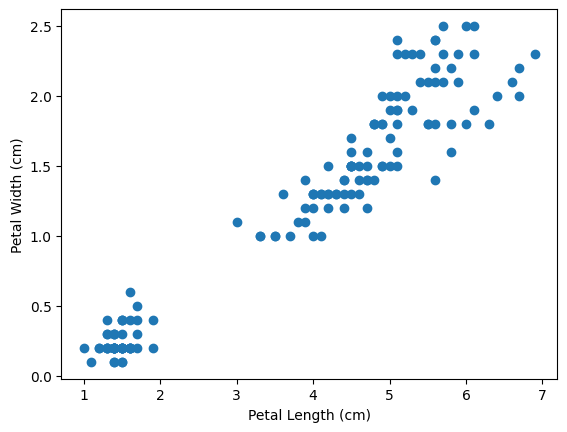

In [5]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

**Feature Scaling with Min-Max Normalization:**

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


**Finding the Optimal Number of Clusters (Elbow Method):**

In [7]:
from sklearn.cluster import KMeans

In [8]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df)
  sse.append(km.inertia_)

sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1677382044747888,
 0.8616150173815893,
 0.6801035704886194,
 0.6407930658825786,
 0.5408219018533268,
 0.45487327585255294]

Text(0, 0.5, 'Sum of Squared Error (SSE)')

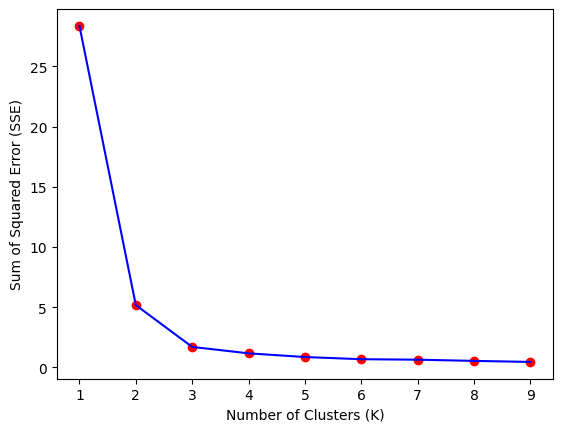

In [9]:
plt.scatter(k_rng, sse, color='r')
plt.plot(k_rng, sse, color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')

**Applying K-Means Clustering, Fitting K-Means on Features, and Predicting Cluster for Each Data Point:**

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

**Adding a New Column (cluster) to Store the Cluster Labels:**

In [11]:
df['clusters'] = y_predicted
df

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


**inding the Cluster Centers (centroids):**

In [12]:
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.55867014, 0.51041667],
       [0.7740113 , 0.81510417]])

**Plotting Clusters with Centroids:**

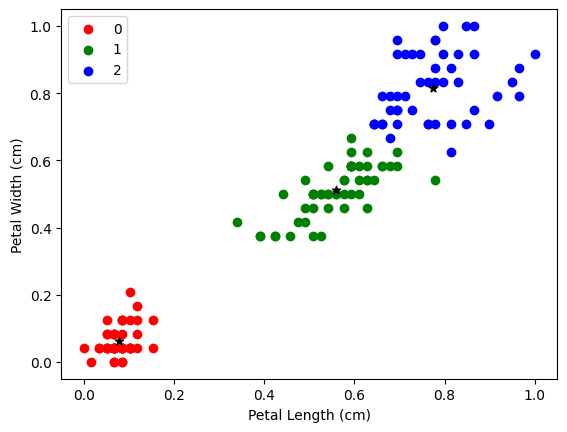

In [13]:
df_0 = df[df.clusters == 0]
df_1 = df[df.clusters == 1]
df_2 = df[df.clusters == 2]

plt.scatter(df_0['petal length (cm)'], df_0['petal width (cm)'], color='r')
plt.scatter(df_1['petal length (cm)'], df_1['petal width (cm)'], color='g')
plt.scatter(df_2['petal length (cm)'], df_2['petal width (cm)'], color='b')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(df.clusters.unique())